# Task 2: Restaurant Recommendation
During this second task, I aim to develop a restaurant recommendation system based on user preferences. This system will leverage user-specific data to provide personalized restaurant suggestions.  
The process will include the following steps:
* **Data Preprocessing:** Clean and prepare the dataset by addressing missing values and encoding categorical variables.
* **Define User Preferences:** Specify criteria for restaurant recommendations, such as preferred cuisines, price ranges, city, and minimum ratings.
* **Implement Content-Based Filtering:** Content-based filtering approach to recommend restaurants that align with the user's specified criteria.
* **Testing the Recommendation System:** Provide sample user preferences to test the system and evaluate the quality of the recommendations.

## Step 1. Data preprocessing
* Handle Missing Values :
Aggregate Rating : Replace 0 ratings with the median rating.
Cuisines : Drop rows where cuisine data is missing.
* Encode Categorical Variables :
Cuisines : Split into binary features using one-hot encoding.


In [61]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

In [62]:
# Load the dataset
restaurant_data = pd.read_csv('D:/Cognifyz internship/Dataset_Cog_int.csv')
restaurant_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [63]:
# display all column names to see which ones are not needed
print(f"colomn names are: {restaurant_data.columns}")
print(f" data shape: {restaurant_data.shape}")

colomn names are: Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
 data shape: (9551, 21)


In [64]:
# Check missing values
missing_values = restaurant_data.isnull().sum()
missing_values

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

It is clear that `Cuisine` has 9 missing values, so we have to remove them 

In [65]:
# Removing missing values
rest_data = restaurant_data.dropna()
miss_val = rest_data.isnull().sum()
print(miss_val)
print(f"shape after remove missing values: {rest_data.shape}")

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
shape after remove missing values: (9542, 21)


In [66]:
# All aggregate ratings
print(rest_data['Aggregate rating'].unique())

[4.8 4.5 4.4 4.9 4.  4.2 4.3 3.6 4.7 3.  3.8 3.7 3.2 3.1 0.  4.1 3.3 4.6
 3.9 3.4 3.5 2.2 2.9 2.4 2.6 2.8 2.1 2.7 2.5 1.8 2.  2.3 1.9]


In [67]:
# Number of restaurent with 0 aggregate rating
print(rest_data['Aggregate rating'].value_counts()[0])

2148


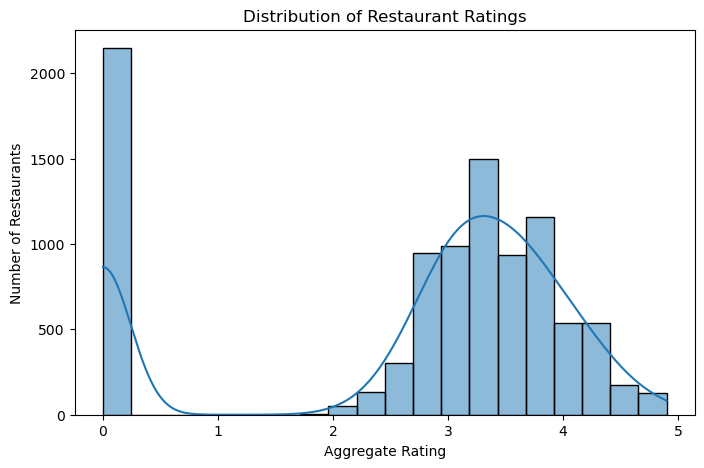

In [68]:
# Plot restaurant ratings
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(rest_data['Aggregate rating'], bins=20, kde=True)
plt.xlabel("Aggregate Rating")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Restaurant Ratings")
plt.show()

Since over 2,000 restaurants have an Aggregate Rating of 0, they should be preprocessed.

In [69]:
# Preprocess missing values
df = rest_data.copy()

In [71]:
# replace 0 values with mean values
df['Aggregate rating'] = df['Aggregate rating'].replace(0, pd.NA)
df['Aggregate rating'] = df['Aggregate rating'].fillna(df['Aggregate rating'].median())
df['Aggregate rating'] = df['Aggregate rating'].infer_objects(copy=False)

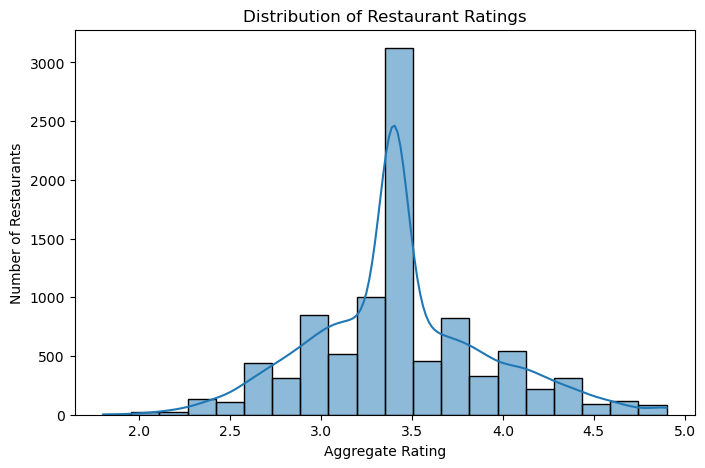

In [72]:
# Plot restaurant new ratings
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.xlabel("Aggregate Rating")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Restaurant Ratings")
plt.show()

Now there is no more `0 values`

In [73]:
# Encode cuisines
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
cuisine_encoded = mlb.fit_transform(df['Cuisines'].str.split(', '))
cuisine_df = pd.DataFrame(cuisine_encoded, columns=mlb.classes_, index=df.index)

# Combine features
features = pd.concat([df[['Price range', 'Aggregate rating']], cuisine_df], axis=1)

## Step 2: Define Recommendation Criteria
Recommendations are based on:

* Cuisine Preference : User-selected cuisines (e.g., Italian, North Indian).
* Price Range : User’s budget (1–4, where 1 is cheapest).
* Minimum Rating : Threshold for quality (e.g., ≥4).

## Step 3: Content-Based Filtering
Calculate similarity between user preferences and restaurants using cosine similarity . Prioritize restaurants matching cuisines, price, and rating.

In [74]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_restaurants(user_preferences, top_n=5):
    # Create user vector
    user_vector = pd.Series(0, index=features.columns)
    for cuisine in user_preferences['cuisines']:
        if cuisine in user_vector.index:
            user_vector[cuisine] = 1
    user_vector['Price range'] = user_preferences['price_range']

    # Filter by rating and price
    filtered = df[
        (df['Aggregate rating'] >= user_preferences['min_rating']) &
        (df['Price range'] <= user_preferences['price_range'])
    ]
    
    # Compute similarity
    similarities = cosine_similarity(features.loc[filtered.index], [user_vector])
    filtered = filtered.assign(Similarity=similarities)
    
    # Return top recommendations
    return filtered.sort_values(by=['Similarity', 'Aggregate rating'], ascending=False).head(top_n)

## Step 4: Test the recommendation System

In [75]:
# Sample User Input :
user_preferences = {
    'cuisines': ['Italian', 'Continental'],
    'price_range': 3,
    'min_rating': 4
}

recommendations = recommend_restaurants(user_preferences)
print(recommendations[['Restaurant Name']])
print(recommendations[['Cuisines', 'Price range', 'Aggregate rating']])

           Restaurant Name
3702        Roadhouse Cafe
3976     Summer House Cafe
9283                  Skye
1441   The Hangout by 1861
6448  Hawalat Lounge & Bar
                                Cuisines  Price range  Aggregate rating
3702                Continental, Italian            3               4.1
3976                Italian, Continental            3               4.1
9283                Italian, Continental            3               4.1
1441      Continental, American, Italian            3               4.0
6448  North Indian, Continental, Italian            3               4.0
